<a href="https://colab.research.google.com/github/bunnyband/Data-Science/blob/main/Belt_Exam_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Dataset

In [ ]:
# Import all Related Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import datetime 
import matplotlib as mpl


drive.mount('/content/drive')

filename = ('/content/drive/MyDrive/employee_attrition.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read data set

In [ ]:
# Check the Contents and Dimension of the Data Set

df = pd.read_csv(filename)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploring the Variables in the Data Set

In [ ]:
# Check if the variables and the data type makes sense

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Search for Duplicate Data - No duplicate data detected

In [ ]:
df.duplicated().sum()

# No duplicate data detected

0

### Check for Inconsistent Data

The idea here is to check all variables INDIVIDUALLY is the data makes sense

#### Col-01 - Age

In [ ]:
# Check the contents under Age
df.value_counts('Age', ascending = True)

Age
57     4
60     5
18     8
19     9
59    10
20    11
21    13
23    14
58    14
56    14
22    16
54    18
52    18
53    19
51    19
48    19
55    22
49    24
47    24
25    26
24    26
50    30
43    32
44    33
46    33
26    39
41    40
45    41
39    42
42    46
28    48
27    48
37    50
40    57
38    58
33    58
30    60
32    61
29    68
36    69
31    69
34    77
35    78
dtype: int64

#### Col-02 - Attrition

In [ ]:
# Check the contents under Attrition

df.value_counts('Attrition', ascending = True)

Attrition
Yes     237
No     1233
dtype: int64

#### Col-03 - BusinessTravel

In [ ]:
# Check the contents under Business Travel

df.value_counts('BusinessTravel', ascending = True)

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64

##### Rename Business Travel Labels

In [ ]:
# The categories need to be renamed for simplicity

df["BusinessTravel"].replace("Travel_Frequently", "Frequent", inplace=True)
df["BusinessTravel"].replace("Travel_Rarely", "Rarely", inplace=True)

#### Col-04 - DailyRate

In [ ]:
# Check the contents under Daily Rate

df.value_counts('DailyRate', ascending = False)

DailyRate
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Length: 886, dtype: int64

#### Col-05 - Department

In [ ]:
# Check the contents under Department

df.value_counts('Department', ascending = False)

Department
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64

#### Col-06 - DistanceFromHome

In [ ]:
# Check the contents under Distance From Home

df.value_counts('DistanceFromHome', ascending = False)

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
dtype: int64

#### Col-07 - Education

In [ ]:
# Check the contents under Education 

df.value_counts('Education')

Education
3    572
4    398
2    282
1    170
5     48
dtype: int64

#### Col-08 - EducationField

In [ ]:
# Check the contents under Education Field

df.value_counts('EducationField')

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
dtype: int64

#### Col-09 - EmployeeCount

In [ ]:
# Check the contents under Employee Count

df.value_counts('EmployeeCount')

EmployeeCount
1    1470
dtype: int64

#### Col-10 - EnvironmentSatisfaction

In [ ]:
# Check the contents under Level of Environment Satisfaction

df.value_counts('EnvironmentSatisfaction')

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
dtype: int64

#### Col-11 - Gender

In [ ]:
# Check the contents under Gender

df.value_counts('Gender')

Gender
Female    588
dtype: int64

##### Fixing Missing Values in Gender

In [ ]:
# Change all Missing Values to Male.
# There is no Male Gender specified in the Original data set.
# There's a huge chance that all the missing data sets under 'Gender' are 'Male'

df['Gender'].fillna(value="Male", inplace=True)

df.value_counts('Gender')

Gender
Male      882
Female    588
dtype: int64

#### Col-12 - HourlyRate

In [ ]:
# Check the contents under Hourly Rate

df.value_counts('HourlyRate')

HourlyRate
66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Length: 71, dtype: int64

#### Col-13 - JobInvolvement

In [ ]:
# Check the contents under Hourly Rate

df.value_counts('JobInvolvement')

JobInvolvement
3    868
2    375
4    144
1     83
dtype: int64

#### Col-14 - JobLevel

In [ ]:
# Check the contents under Job Level

df.value_counts('JobLevel')

JobLevel
1    543
2    534
3    218
4    106
5     69
dtype: int64

#### Col-15 - JobRole

In [ ]:
# Check the contents under Job Role

df.value_counts('JobRole')

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64

#### Col-16 - JobSatisfaction

In [ ]:
# Check the contents under Job Satisfaction

df.value_counts('JobSatisfaction')

JobSatisfaction
4    459
3    442
1    289
2    280
dtype: int64

#### Col-17 - MaritalStatus

In [ ]:
# Check the contents under Marital Status

df.value_counts('MaritalStatus')

MaritalStatus
Married     673
Single      470
Divorced    327
dtype: int64

#### Col-18 - MonthlyIncome

In [ ]:
# Check the contents under Monthly Income

df.value_counts('MonthlyIncome')

MonthlyIncome
2342     4
2380     3
2741     3
2404     3
2610     3
        ..
4066     1
4051     1
4037     1
4035     1
19999    1
Length: 1349, dtype: int64

#### Col-19 - MonthlyRate

In [ ]:
# Check the contents under Monthly Rate

df.value_counts('MonthlyRate')

MonthlyRate
4223     3
9150     3
6069     2
12355    2
8952     2
        ..
10261    1
10228    1
10227    1
10225    1
26999    1
Length: 1427, dtype: int64

#### Col-20 - NumCompaniesWorked

In [ ]:
# Check the contents under Number of Companies Worked before

df.value_counts('NumCompaniesWorked')

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
dtype: int64

#### Col-21 - Over18

In [ ]:
# Check the contents under Over 18
# Makes sense because minimum age of employee is 18
df.value_counts('Over18')

Over18
Y    1470
dtype: int64

#### Col-22 - OverTime

In [ ]:
# Check the contents under OverTime
df.value_counts('OverTime')

OverTime
No     1054
Yes     416
dtype: int64

#### Col-23 - PercentSalaryHike

In [ ]:
# Check the contents under Percent Salary Hike
df.value_counts('PercentSalaryHike')

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
dtype: int64

#### Col-24 - PerformanceRating

In [ ]:
# Check the contents under Performance Rating
df.value_counts('PerformanceRating')

PerformanceRating
3    1244
4     226
dtype: int64

#### Col-25 - RelationshipSatisfaction

In [ ]:
# Check the contents under Relationship Satisfaction
df.value_counts('RelationshipSatisfaction')

RelationshipSatisfaction
3    459
4    432
2    303
1    276
dtype: int64

#### Col-26 - StandardHours

In [ ]:
# Check the contents under Standard Hours

df.value_counts('StandardHours')

StandardHours
80    1470
dtype: int64

#### Col-27 - StockOptionLevel

In [ ]:
# Check the contents under Stock Option Level
df.value_counts('StockOptionLevel')

StockOptionLevel
0    631
1    596
2    158
3     85
dtype: int64

Col-28 - TotalWorkingYears

In [ ]:
# Check the contents under Total Working Years
df.value_counts('TotalWorkingYears')

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
dtype: int64

#### Col-28 - TrainingTimesLastYear

In [ ]:
# Check the contents under Training Times Last Year
df.value_counts('TrainingTimesLastYear')

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
dtype: int64

#### Col-29 - WorkLifeBalance

In [ ]:
# Check the contents under Work Life Balance

df.value_counts('WorkLifeBalance')

WorkLifeBalance
3    893
2    344
4    153
1     80
dtype: int64

#### Col-30 - YearsAtCompany

In [ ]:
# Check the contents under Years at Company

df.value_counts('YearsAtCompany')

YearsAtCompany
5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
21     14
12     14
18     13
16     12
19     11
17      9
24      6
33      5
26      4
25      4
32      3
31      3
36      2
29      2
27      2
23      2
34      1
37      1
30      1
40      1
5!      1
dtype: int64

##### Change Inconsistent Data at YearsAtCompany

In [ ]:
# Takin a look at the last data, it says '5!' 
# Change type to null value.
df["YearsAtCompany"].replace("5!", "0", inplace=True)

In [ ]:
# Change null value to mean of all the Years at Company
mean_value=df['YearsAtCompany'].mean()
df['YearsAtCompany'].fillna(value=mean_value, inplace=True)

df.value_counts('YearsAtCompany')

YearsAtCompany
5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      45
11     32
20     27
13     24
15     20
14     18
22     15
21     14
12     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
32      3
31      3
36      2
29      2
27      2
23      2
34      1
37      1
30      1
40      1
dtype: int64

In [ ]:
# Change data type to float since the original data registered 'object'
df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'], downcast = 'float')

#### Col-31 - YearsInCurrentRole

In [ ]:
# Check the contents under Years in Current Role
df.value_counts('YearsInCurrentRole')

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
dtype: int64

#### Col-32 - YearsSinceLastPromotion

In [ ]:
# Check the contents under Years Since Last Promotion
df.value_counts('YearsSinceLastPromotion')

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
dtype: int64

#### Col-33 - YearsWithCurrManager

In [ ]:
# Check the contents under Years with Current Manager
df.value_counts('YearsWithCurrManager')

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
dtype: int64

#### Col-34 - TotalWorkingYears

In [ ]:
# Check the contents under Total Working Years
df.value_counts('TotalWorkingYears')

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
dtype: int64

### Visualizations

This section visualizes basic information about the employees in the company

#### 01 - Percentage of Employees in Each Department

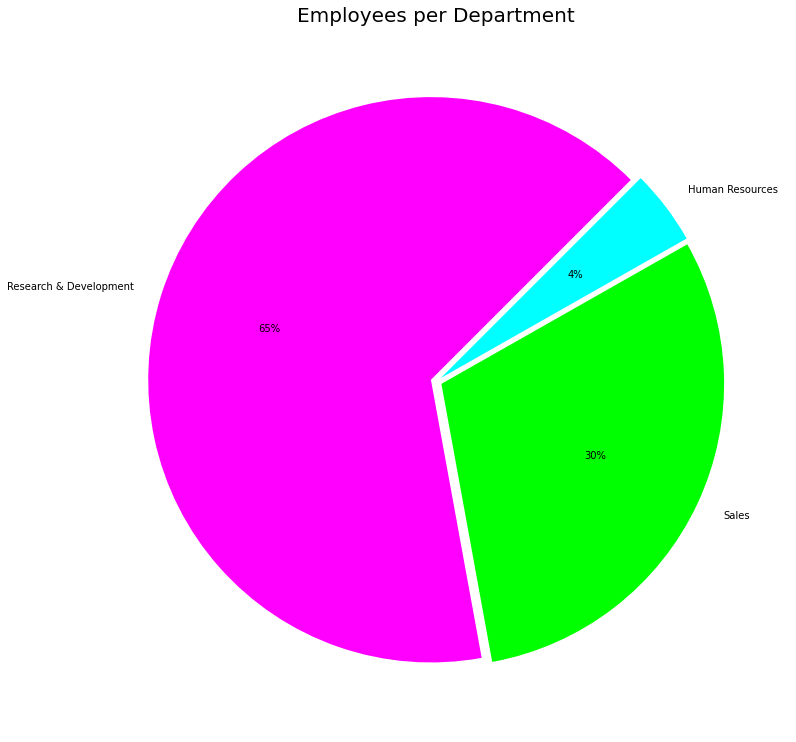

In [ ]:
explode1 = (0.02, 0.02, 0.02)
x1 = df['Department'].value_counts()
mycolors1 = ["fuchsia", "lime", "aqua"]

x1.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode1, startangle = 45, colors = mycolors1);
plt.title('Employees per Department', fontsize = 20);
plt.ylabel('', fontsize = 30);

#### 02 - Distribution of Gender

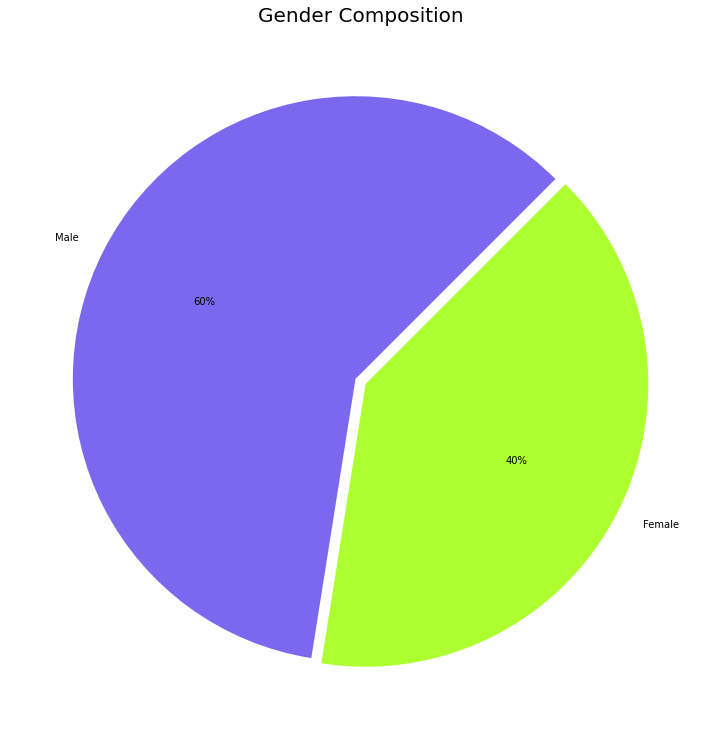

In [ ]:
explode2 = (0.02, 0.02)
x2 = df['Gender'].value_counts()
mycolors2 = ["mediumslateblue", "greenyellow"]

x2.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode2, startangle = 45, colors = mycolors2);
plt.title('Gender Composition', fontsize = 20);
plt.ylabel('', fontsize = 30);

#### 03 - Distribution of Attrition

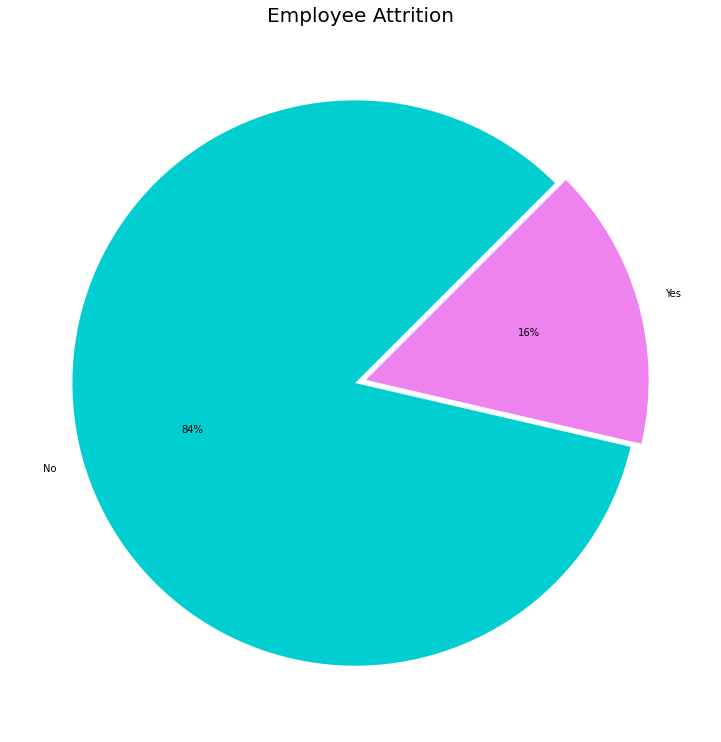

In [ ]:
explode3 = (0.02, 0.02)
x3 = df['Attrition'].value_counts()
mycolors3 = ["darkturquoise", "violet"]

x3.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode3, startangle = 45, colors = mycolors3);
plt.title('Employee Attrition', fontsize = 20);
plt.ylabel('', fontsize = 30);

#### 04 - Frequency of Business Travel Per Employee

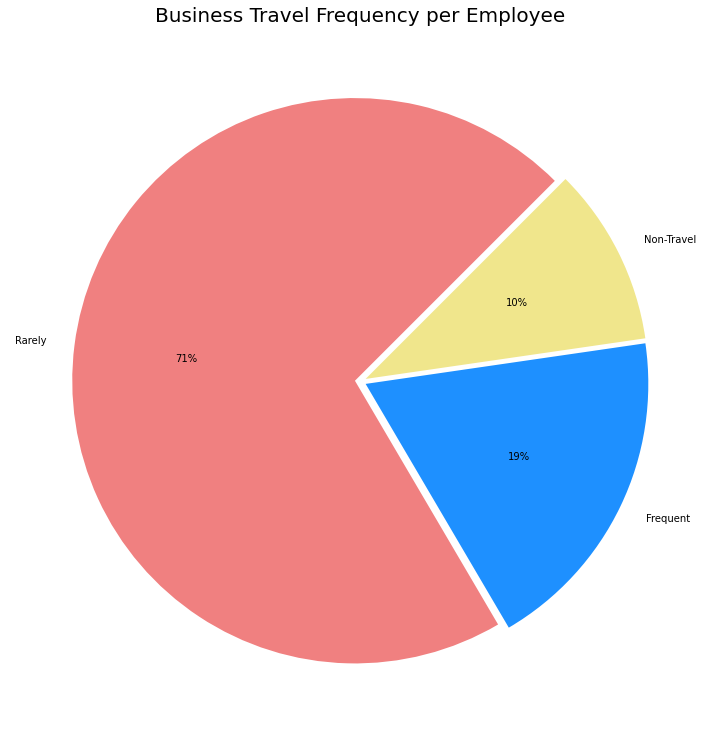

In [ ]:
explode4 = (0.02, 0.02, 0.02)
x4 = df['BusinessTravel'].value_counts()
mycolors4 = ["lightcoral", "dodgerblue", "khaki"]

x4.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode4, startangle = 45, colors = mycolors4);
plt.title('Business Travel Frequency per Employee', fontsize = 20);
plt.ylabel('', fontsize = 30);

#### 05 - Education

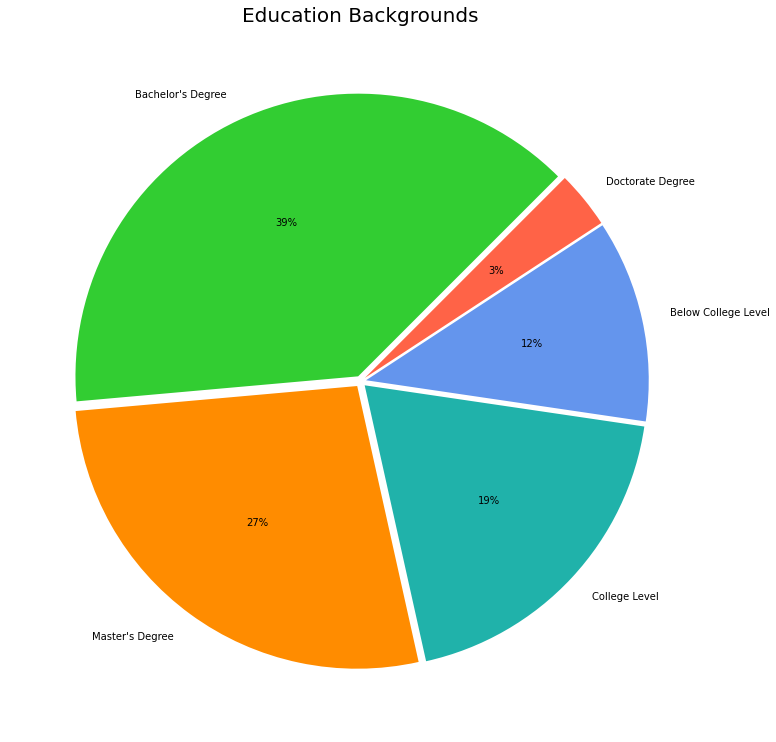

In [ ]:
explode5 = (0.02, 0.02, 0.02, 0.02, 0.02)
x5 = df['Education'].value_counts()
mycolors5 = ["limegreen", "darkorange", "lightseagreen", "cornflowerblue", "tomato"]
mylabels5 = ["Bachelor's Degree", "Master's Degree", "College Level", "Below College Level", "Doctorate Degree"]


x5.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode5, startangle = 45, colors = mycolors5, labels = mylabels5);
plt.title('Education Backgrounds', fontsize = 20);
plt.ylabel('', fontsize = 30);

#### - 06 - Field of Education

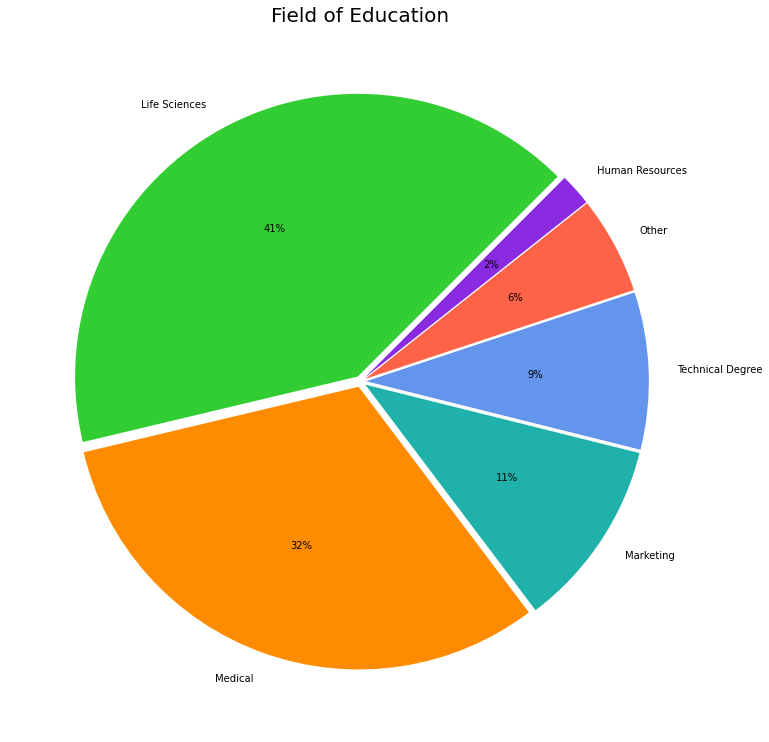

In [ ]:
explode6 = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
x6 = df['EducationField'].value_counts()
mycolors6 = ["limegreen", "darkorange", "lightseagreen", "cornflowerblue", "tomato", "blueviolet"]



x6.plot.pie(figsize = (25, 13), autopct='%.0f%%', explode = explode6, startangle = 45, colors = mycolors6);
plt.title('Field of Education', fontsize = 20);
plt.ylabel('', fontsize = 30);

### Segregating 16% Attrition and 84% Non-Attrition

The idea of segregation is that we want to know what is the problem with those 16% of the people who will leave the company. 

We will place them side by side with those 84% of employees who will stay to check if we can gain valuable insight from it. 

In [ ]:
# Make Data frame for the 16% of Employees who will depart. 

df_Attrition = df['Attrition'] == 'Yes'

df_Attrition1 = df.loc[df_Attrition,: ]

df_Attrition1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6.0,4,0,5
2,37,Yes,Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0.0,0,0,0
14,28,Yes,Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4.0,2,0,3
21,36,Yes,Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5.0,3,0,3
24,34,Yes,Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Frequent,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1.0,0,1,0
1442,29,Yes,Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2.0,2,2,2
1444,56,Yes,Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10.0,9,9,8
1452,50,Yes,Frequent,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6.0,3,0,1


In [ ]:
# Make Data frame for the 84% of Employees who will stay.

df_Attrition2 = df.loc[~df_Attrition,: ]

df_Attrition2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Frequent,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10.0,7,1,7
3,33,No,Frequent,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8.0,7,3,0
4,27,No,Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2.0,2,2,2
5,32,No,Frequent,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7.0,7,3,6
6,59,No,Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Frequent,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5.0,2,0,3
1466,39,No,Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7.0,7,1,7
1467,27,No,Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6.0,2,0,3
1468,49,No,Frequent,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9.0,6,0,8


### Visualization of Attrition per Individual Factors

This section investigates all the appropriate factors that may affect attrition of the employee. Attrition is indicated in Red while the Non-Attrition is indicated in Blue

#### Attrition vs Business Travels

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


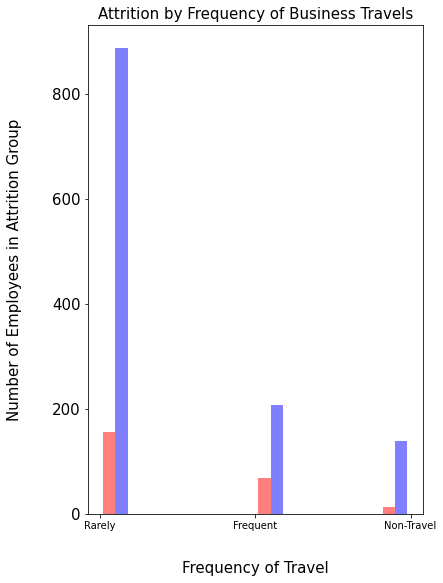

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 9) )

plt.hist([df_Attrition1['BusinessTravel'], df_Attrition2['BusinessTravel']], color=['r','b'], alpha=0.5);
plt.yticks(fontsize = 15);
plt.title('Attrition by Frequency of Business Travels', fontsize = 15);
plt.xlabel('Frequency of Travel', fontsize = 15, labelpad = 30);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 30);
plt.savefig('01 - Attrition vs Business Travels', dpi = 300)

#### Attrition vs Age

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


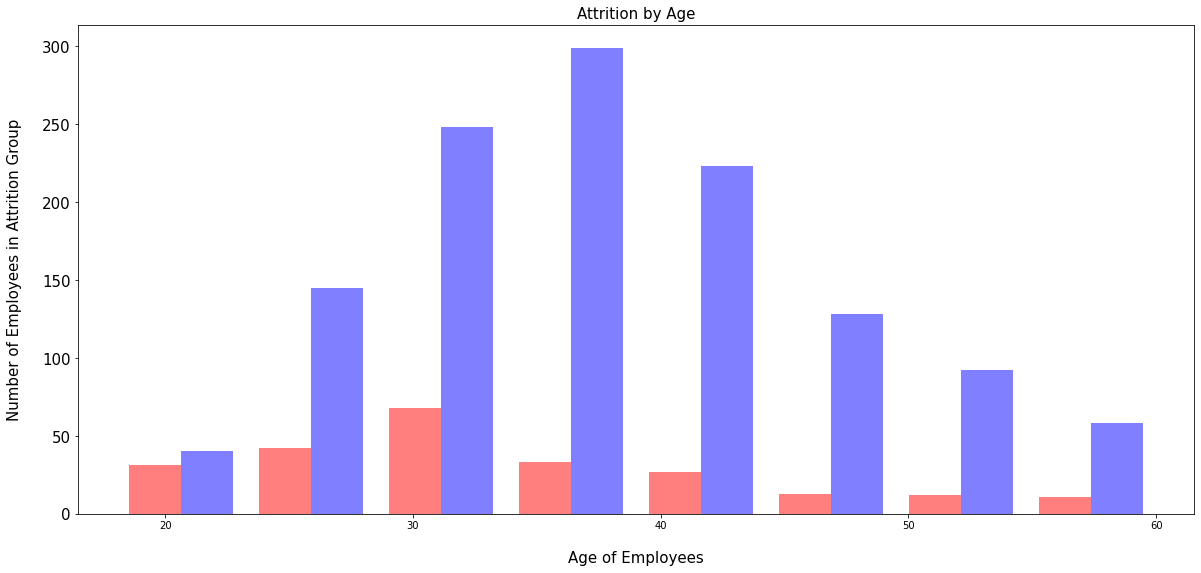

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 9) )

plt.hist([df_Attrition1['Age'], df_Attrition2['Age']], color=['r','b'], alpha=0.5, bins = 8);
plt.yticks(fontsize = 15);
plt.title('Attrition by Age', fontsize = 15);
plt.xlabel('Age of Employees', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 20);
plt.savefig('02 - Attrition vs Age', dpi = 300)

#### Attrition vs DailyRate

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


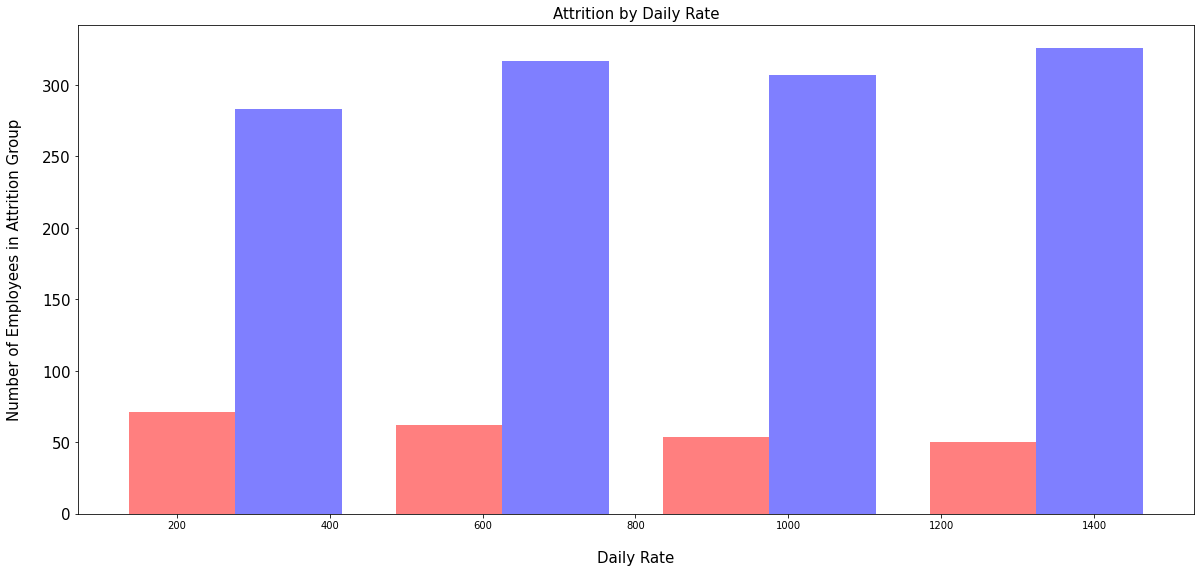

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 9) )

plt.hist([df_Attrition1['DailyRate'], df_Attrition2['DailyRate']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.title('Attrition by Daily Rate', fontsize = 15);
plt.xlabel('Daily Rate', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 20);
plt.savefig('03 - Attrition vs Daily Rate', dpi = 300)

#### Attrition vs Department

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


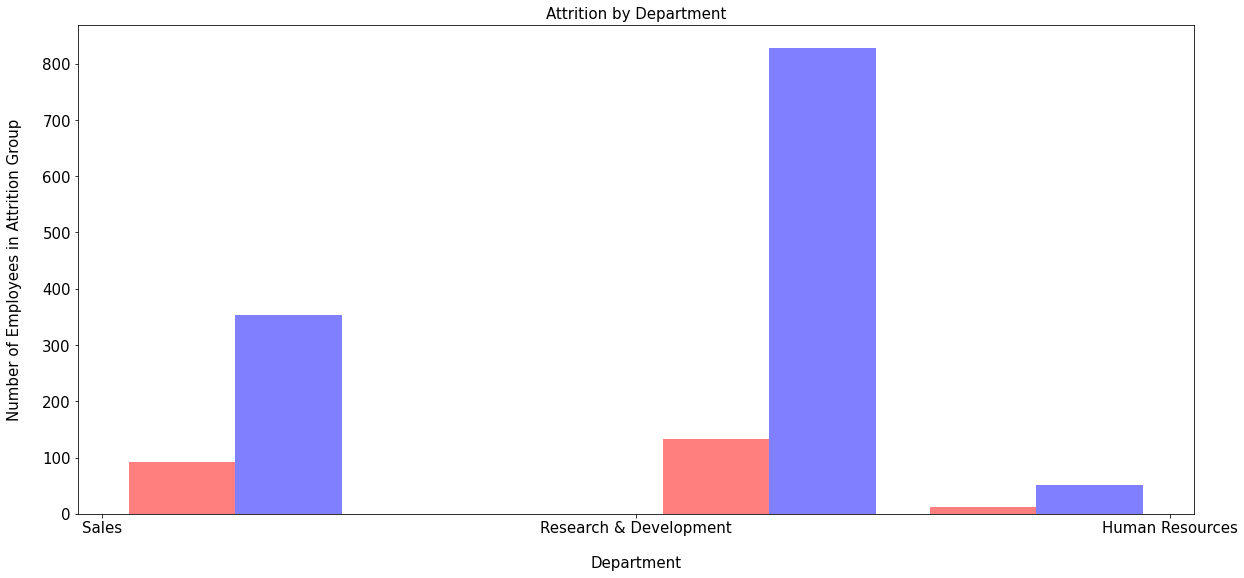

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 9) )

plt.hist([df_Attrition1['Department'], df_Attrition2['Department']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Department', fontsize = 15);
plt.xlabel('Department', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 20);
plt.savefig('04 - Attrition vs Department', dpi = 300)

#### Attrition vs Distance From Home

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


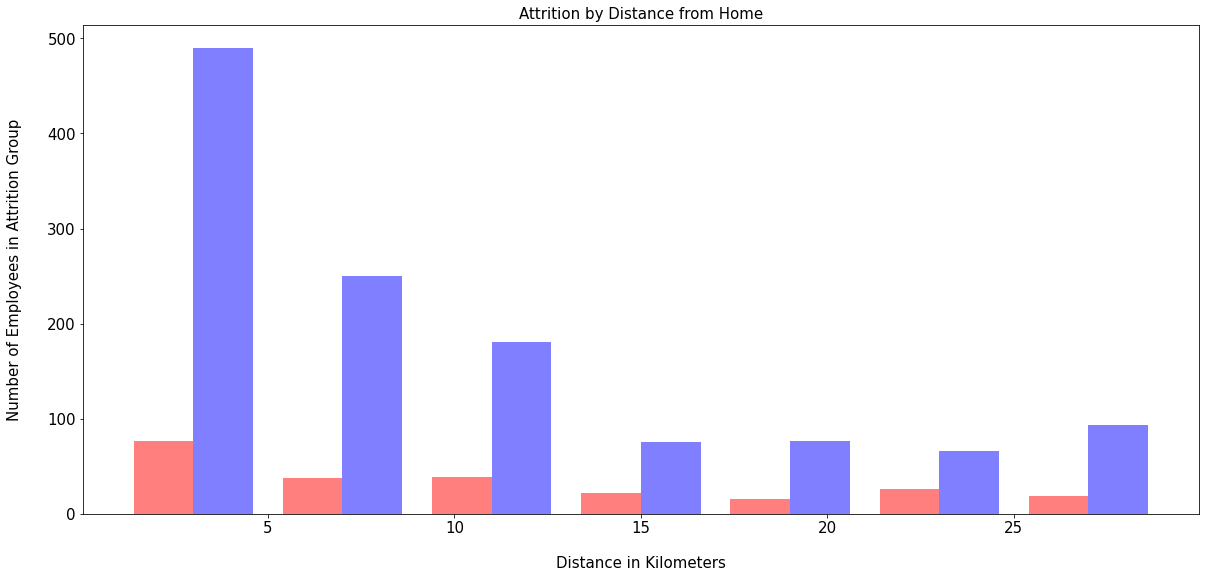

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 9) )

plt.hist([df_Attrition1['DistanceFromHome'], df_Attrition2['DistanceFromHome']], color=['r','b'], alpha=0.5, bins = 7);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Distance from Home', fontsize = 15);
plt.xlabel('Distance in Kilometers', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('05 - Attrition vs Distance From Home', dpi = 300)

#### Attrition vs Environment Satisfaction

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


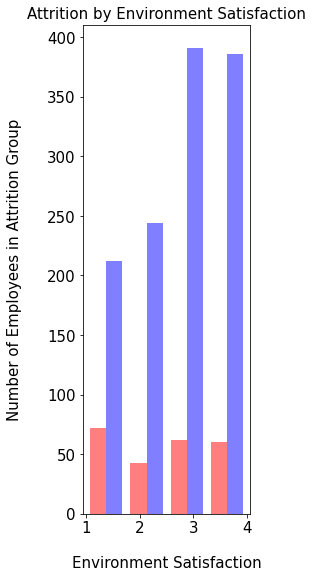

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['EnvironmentSatisfaction'], df_Attrition2['EnvironmentSatisfaction']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Environment Satisfaction', fontsize = 15);
plt.xlabel('Environment Satisfaction', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('06 - Attrition vs Environment Satifaction', dpi = 300)

#### Attrition vs Education

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


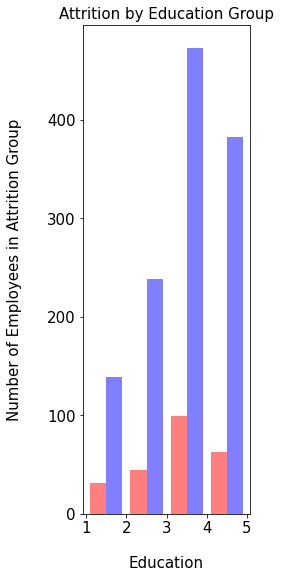

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9))

plt.hist([df_Attrition1['Education'], df_Attrition2['Education']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Education Group', fontsize = 15);
plt.xlabel('Education', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('07 - Attrition vs Education', dpi = 300)

#### Attrition vs JobSatisfaction

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


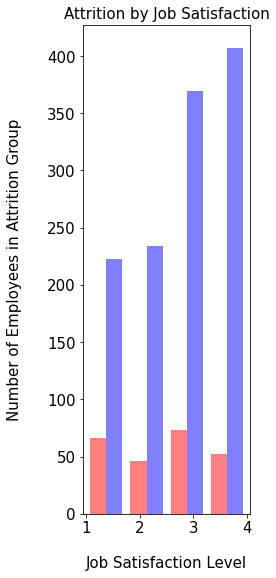

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['JobSatisfaction'], df_Attrition2['JobSatisfaction']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Job Satisfaction', fontsize = 15);
plt.xlabel('Job Satisfaction Level', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('01 - Attrition vs Job Satisfaction', dpi = 300)

#### Attrition vs YearsSinceLastPromotion

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


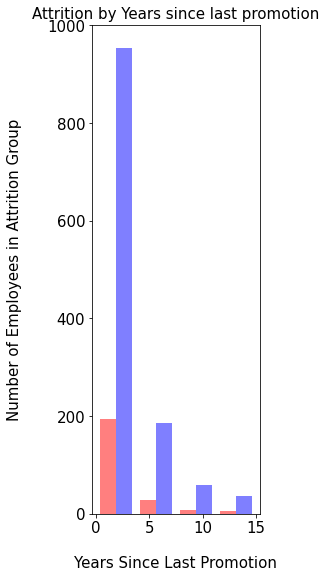

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['YearsSinceLastPromotion'], df_Attrition2['YearsSinceLastPromotion']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Years since last promotion', fontsize = 15);
plt.xlabel('Years Since Last Promotion', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('09 - Attrition vs Years Since Last Promotion', dpi = 300)

#### Attrition vs Total Working Years

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


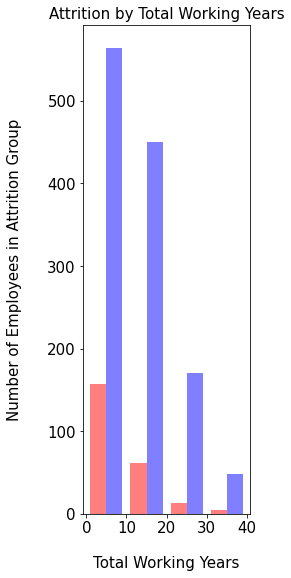

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['TotalWorkingYears'], df_Attrition2['TotalWorkingYears']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Total Working Years', fontsize = 15);
plt.xlabel('Total Working Years', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('10 - Attrition vs Total Working Years', dpi = 300)

#### Attrition vs Years with Current Manager

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


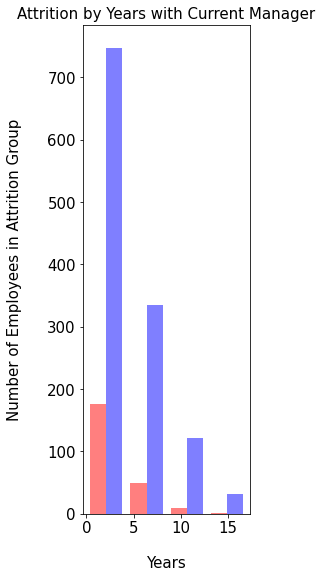

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['YearsWithCurrManager'], df_Attrition2['YearsWithCurrManager']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Years with Current Manager', fontsize = 15);
plt.xlabel('Years', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('11 - Attrition vs Years With Current Manager', dpi = 300)

#### Attrition vs Years Since Last Promotion

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


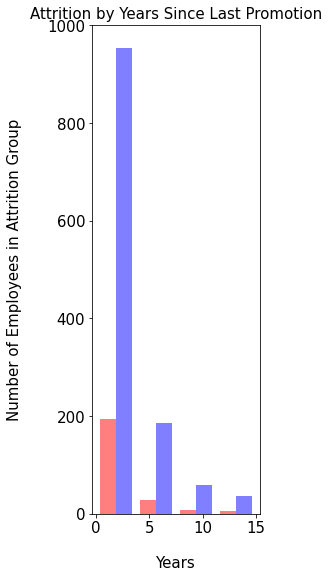

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['YearsSinceLastPromotion'], df_Attrition2['YearsSinceLastPromotion']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Years Since Last Promotion', fontsize = 15);
plt.xlabel('Years', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('12 - Attrition vs Years Since Last Promotion', dpi = 300)

#### Attrition vs Years In Current Role

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


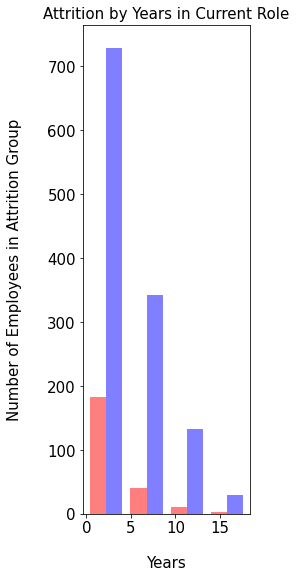

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['YearsInCurrentRole'], df_Attrition2['YearsInCurrentRole']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Years in Current Role', fontsize = 15);
plt.xlabel('Years', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('13 - Attrition vs Years In Current Role', dpi = 300)

#### Attrition vs Years At Company

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


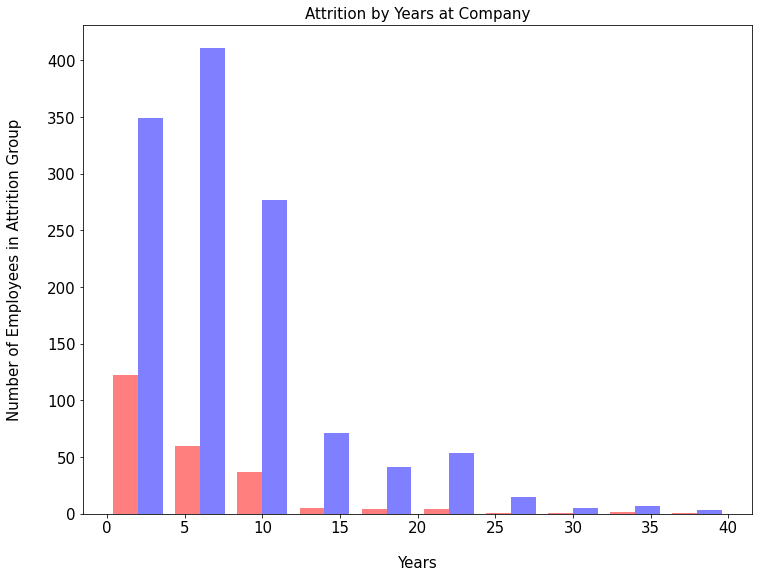

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['YearsAtCompany'], df_Attrition2['YearsAtCompany']], color=['r','b'], alpha=0.5, bins = 10);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Years at Company', fontsize = 15);
plt.xlabel('Years', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('14 - Attrition vs Years At Company', dpi = 300)

#### Attrition vs Work Life Balance

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


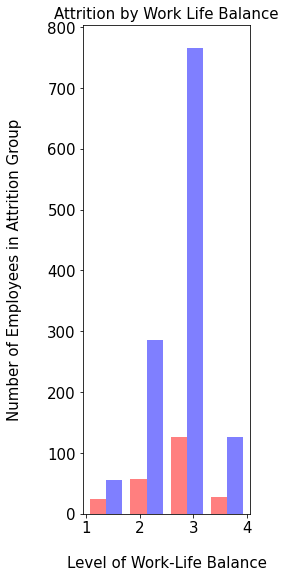

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['WorkLifeBalance'], df_Attrition2['WorkLifeBalance']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Work Life Balance', fontsize = 15);
plt.xlabel('Level of Work-Life Balance', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('15 - Attrition vs Work Life Balance', dpi = 300)

#### Attrition vs Training Times Previous Year

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


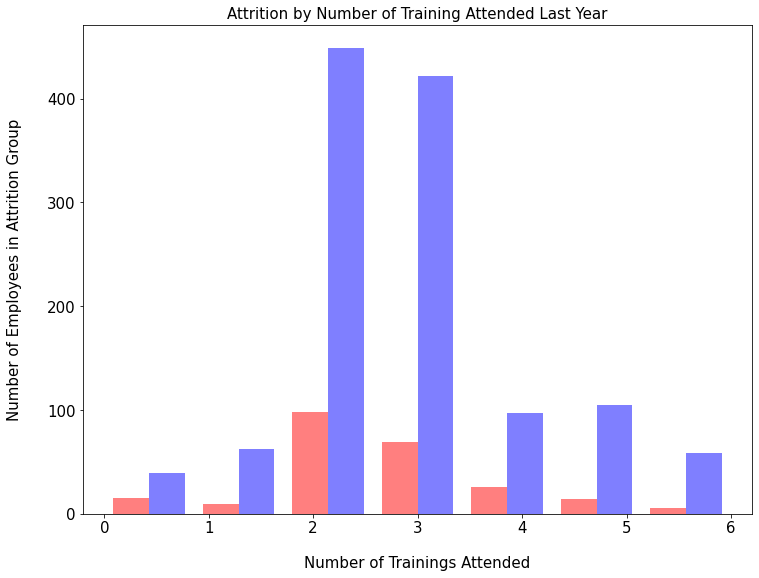

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['TrainingTimesLastYear'], df_Attrition2['TrainingTimesLastYear']], color=['r','b'], alpha=0.5, bins = 7);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Number of Training Attended Last Year', fontsize = 15);
plt.xlabel('Number of Trainings Attended', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('16 - Attrition vs Trainings Attended Last Year', dpi = 300)

#### Attrition vs Relationship Satisfaction

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


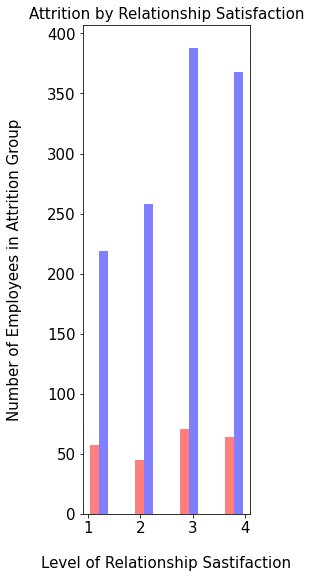

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['RelationshipSatisfaction'], df_Attrition2['RelationshipSatisfaction']], color=['r','b'], alpha=0.5, bins = 7);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Relationship Satisfaction', fontsize = 15);
plt.xlabel('Level of Relationship Sastifaction', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('17 - Attrition vs Relationship Satisfaction', dpi = 300)

#### Attrition vs Performance Rating

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


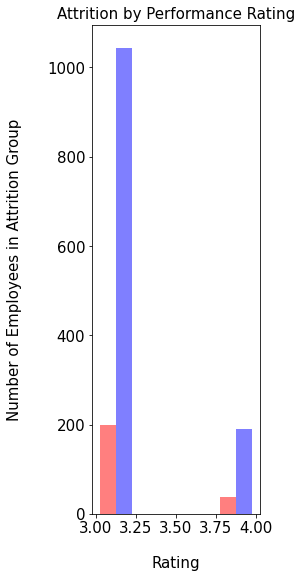

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['PerformanceRating'], df_Attrition2['PerformanceRating']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Performance Rating', fontsize = 15);
plt.xlabel('Rating', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('18 - Attrition vs Performance Rating', dpi = 300)

#### Attrition vs Percent Salary Hike

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


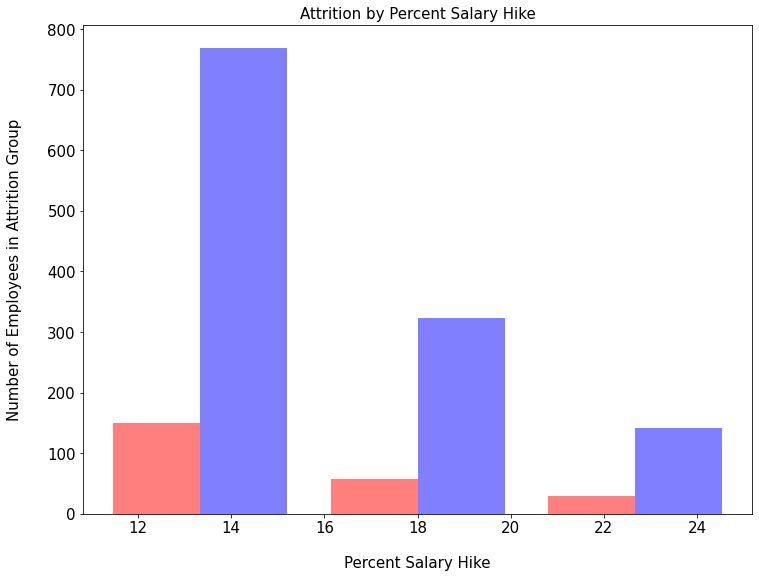

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['PercentSalaryHike'], df_Attrition2['PercentSalaryHike']], color=['r','b'], alpha=0.5, bins = 3);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Percent Salary Hike', fontsize = 15);
plt.xlabel('Percent Salary Hike', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('19 - Attrition vs Percent Salary Hike', dpi = 300)

#### Attrition vs OverTime

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


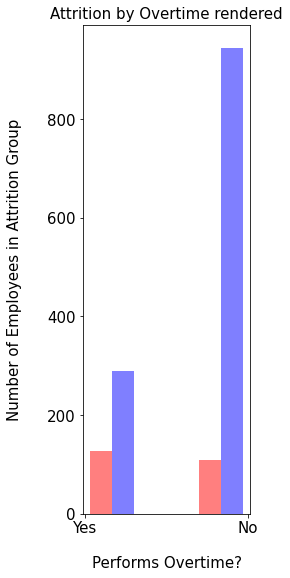

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['OverTime'], df_Attrition2['OverTime']], color=['r','b'], alpha=0.5, bins = 3);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Overtime rendered', fontsize = 15);
plt.xlabel('Performs Overtime?', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('20 - Attrition vs Overtime', dpi = 300)

#### Attrition vs Number of Companies Worked

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


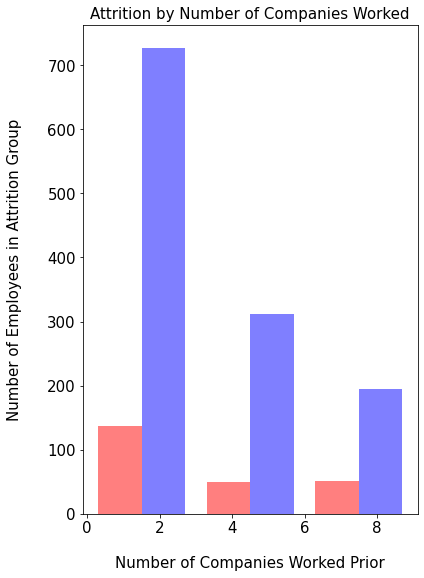

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 9) )

plt.hist([df_Attrition1['NumCompaniesWorked'], df_Attrition2['NumCompaniesWorked']], color=['r','b'], alpha=0.5, bins = 3);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Number of Companies Worked', fontsize = 15);
plt.xlabel('Number of Companies Worked Prior', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('21 - Attrition vs No of Companies Worked', dpi = 300)

#### Attrition vs Monthly Rate

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


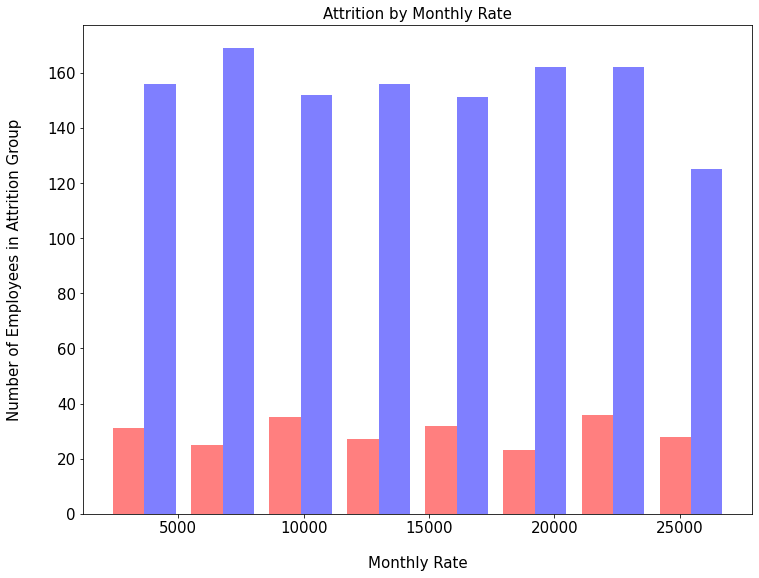

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['MonthlyRate'], df_Attrition2['MonthlyRate']], color=['r','b'], alpha=0.5, bins = 8);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Monthly Rate', fontsize = 15);
plt.xlabel('Monthly Rate', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('22 - Attrition vs Monthly Rate', dpi = 300)

#### Attrition vs Marital Status

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


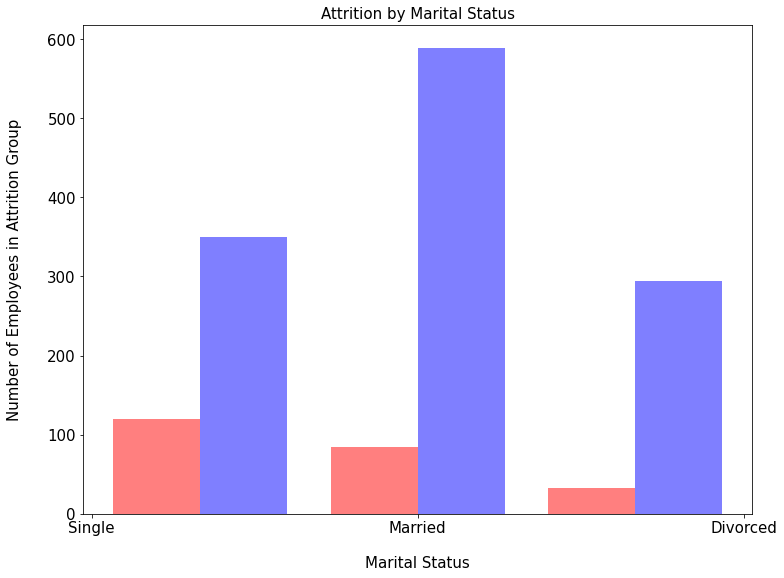

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['MaritalStatus'], df_Attrition2['MaritalStatus']], color=['r','b'], alpha=0.5, bins = 3);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 0, fontsize = 15);
plt.title('Attrition by Marital Status', fontsize = 15);
plt.xlabel('Marital Status', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('23 - Attrition vs Marital Status', dpi = 300)

#### Attrition vs Job Role

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


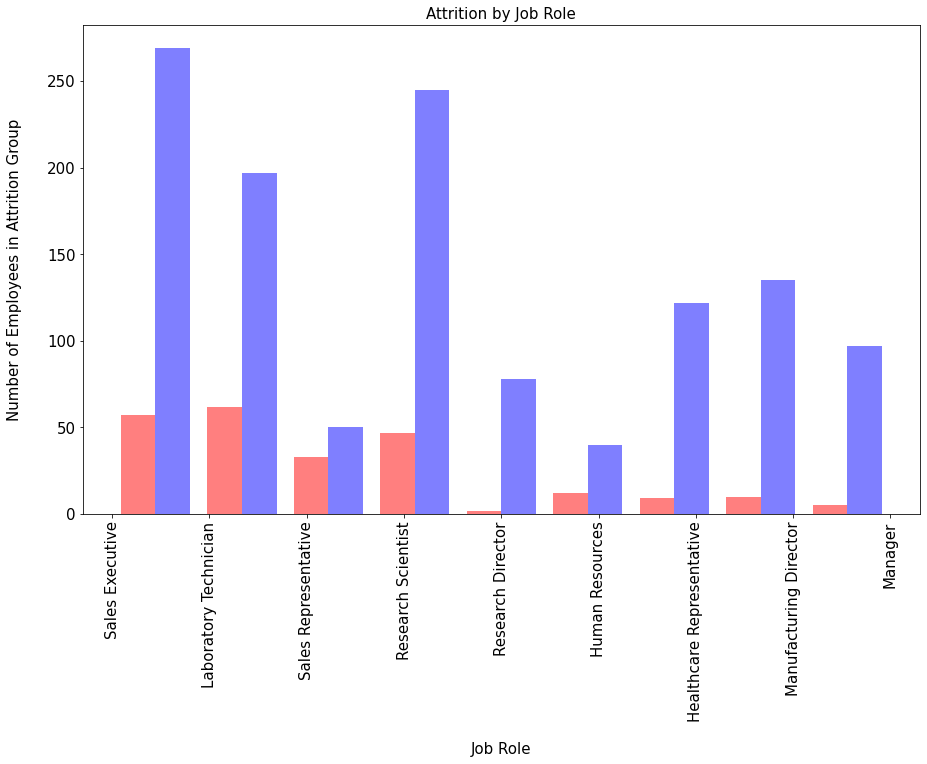

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 9) )

plt.hist([df_Attrition1['JobRole'], df_Attrition2['JobRole']], color=['r','b'], alpha=0.5, bins = 9);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 90, fontsize = 15);
plt.title('Attrition by Job Role', fontsize = 15);
plt.xlabel('Job Role', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('24 - Attrition vs Job Role', dpi = 300)

#### Attrition vs Job Level

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


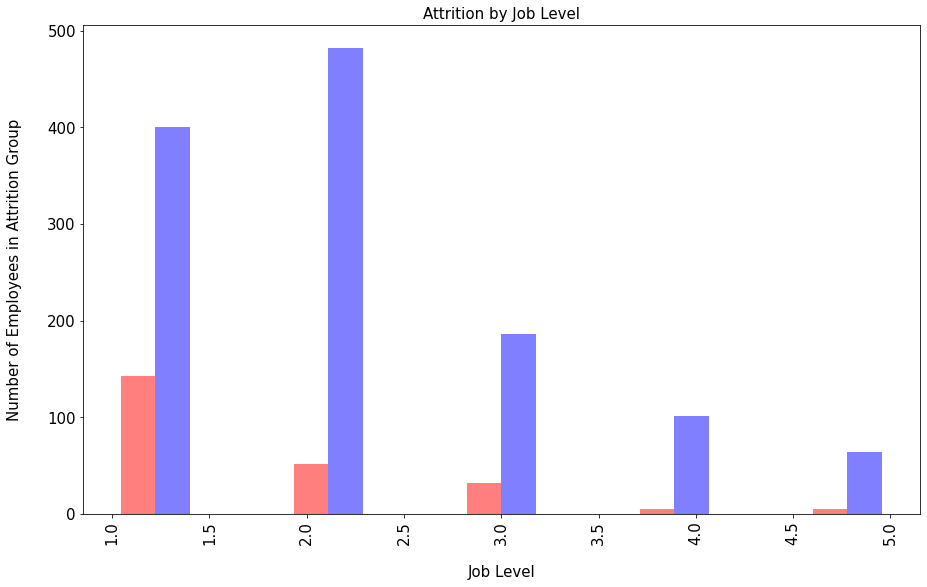

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 9) )

plt.hist([df_Attrition1['JobLevel'], df_Attrition2['JobLevel']], color=['r','b'], alpha=0.5, bins = 9);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 90, fontsize = 15);
plt.title('Attrition by Job Level', fontsize = 15);
plt.xlabel('Job Level', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('25 - Attrition vs Job Level', dpi = 300)

#### Attrition vs Job Involvement

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


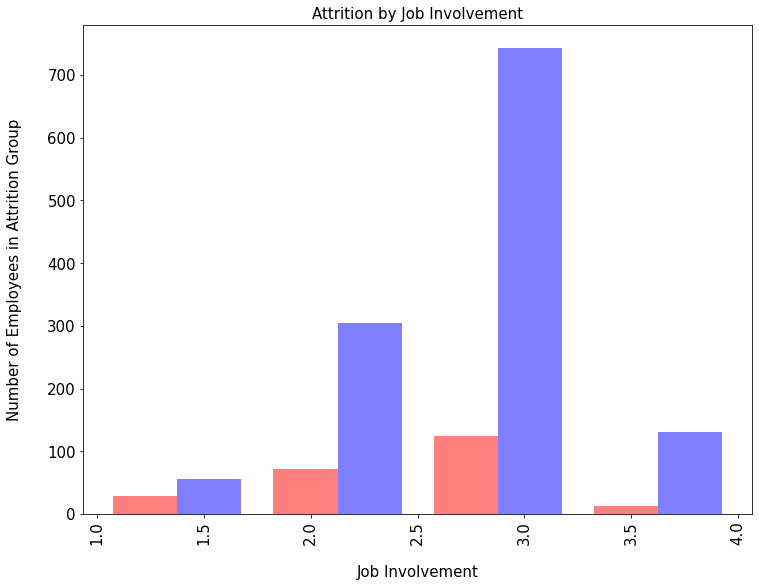

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9) )

plt.hist([df_Attrition1['JobInvolvement'], df_Attrition2['JobInvolvement']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 90, fontsize = 15);
plt.title('Attrition by Job Involvement', fontsize = 15);
plt.xlabel('Job Involvement', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('26 - Attrition vs Job Involvement', dpi = 300)

#### Attrition vs Gender

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


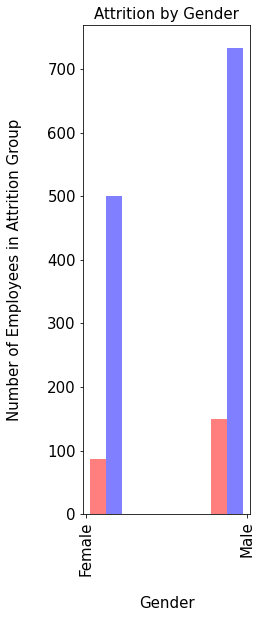

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(3, 9) )

plt.hist([df_Attrition1['Gender'], df_Attrition2['Gender']], color=['r','b'], alpha=0.5, bins = 4);
plt.yticks(fontsize = 15);
plt.xticks(rotation = 90, fontsize = 15);
plt.title('Attrition by Gender', fontsize = 15);
plt.xlabel('Gender', fontsize = 15, labelpad = 20);
plt.ylabel('Number of Employees in Attrition Group', fontsize = 15, labelpad = 25);
plt.savefig('27 - Attrition vs Gender', dpi = 300)

#### Box Plot Comparison - Gender vs Age in Attrition Group

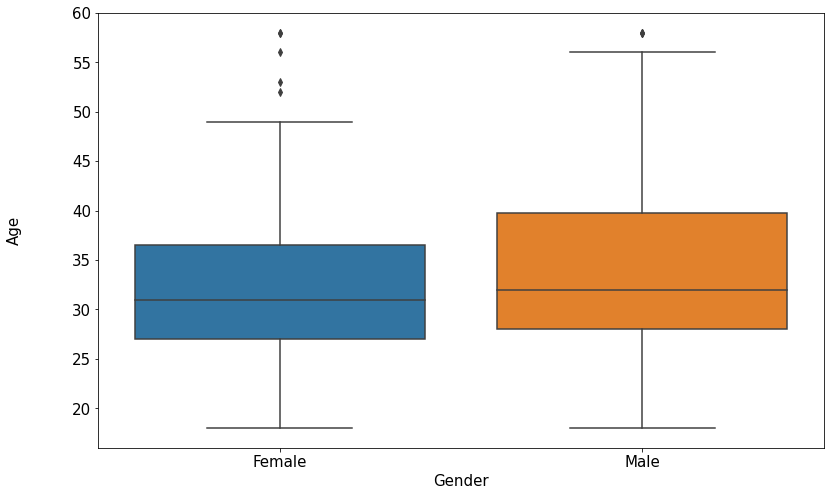

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (13,8));
sns.boxplot(x = 'Gender', y = 'Age', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Age', fontsize = 15, labelpad = 50);
plt.savefig('28 - Boxplot Gender - Age', dpi = 300)

#### Box Plot Comparison - Gender vs MonthlyRate in Attrition Group

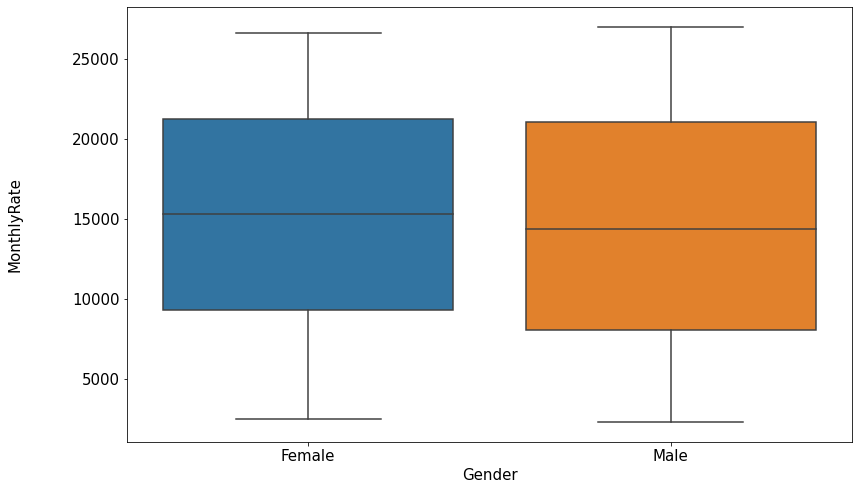

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (13,8));
sns.boxplot(x = 'Gender', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('MonthlyRate', fontsize = 15, labelpad = 50);
plt.savefig('29 - Boxplot Gender - MonthlyRate', dpi = 300)


#### Box Plot Comparison - Marital Status vs Monthly Rate in Attrition Group

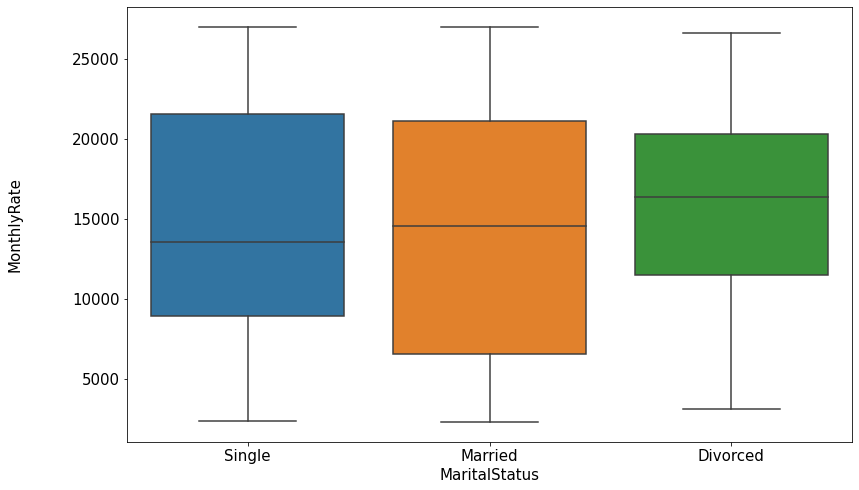

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (13,8));
sns.boxplot(x = 'MaritalStatus', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('MaritalStatus', fontsize = 15);
plt.ylabel('MonthlyRate', fontsize = 15, labelpad = 50);
plt.savefig('30 - Boxplot Marital Status - Monthly Rate', dpi = 300)

#### Box Plot Comparison - Education vs Monthly Rate in Attrition Group

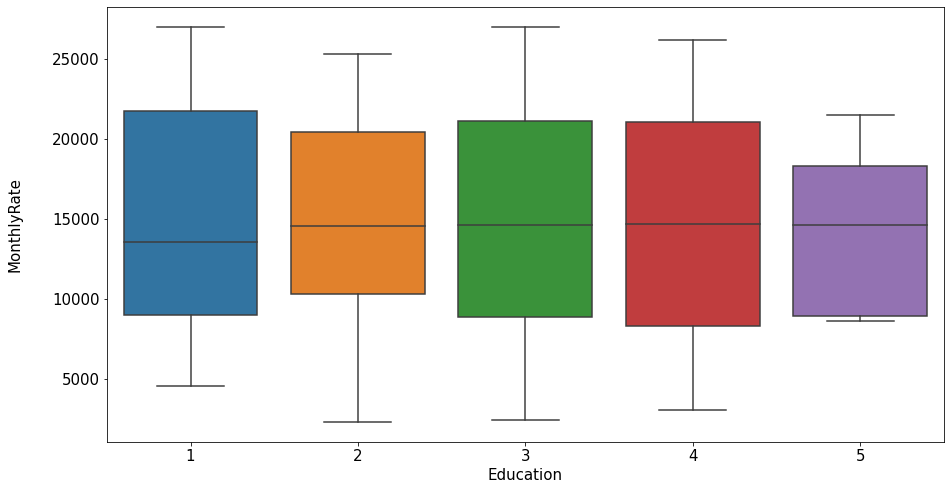

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8));
sns.boxplot(x = 'Education', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Education', fontsize = 15);
plt.ylabel('MonthlyRate', fontsize = 15, labelpad = 30);
plt.savefig('31 - Boxplot Education - Monthly Rate', dpi = 300)

#### Box Plot Comparison - Job Involvement vs MonthlyRate

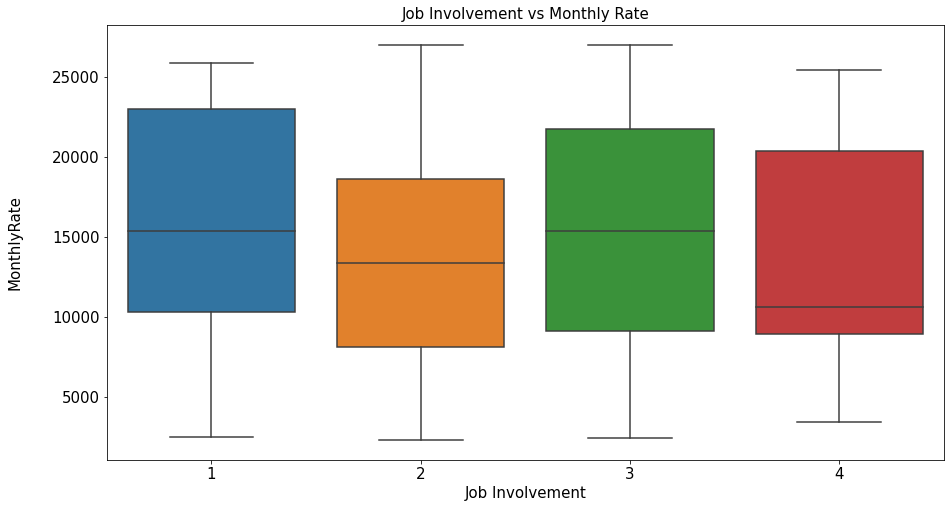

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8));
sns.boxplot(x = 'JobInvolvement', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.title('Job Involvement vs Monthly Rate', fontsize = 15);
plt.xlabel('Job Involvement', fontsize = 15);
plt.ylabel('MonthlyRate', fontsize = 15, labelpad = 30);
plt.savefig('32 - Job Involvement - Monthly Rate', dpi = 300)

#### Box Plot Comparison - Job Involvement vs Salary Hike Percentage

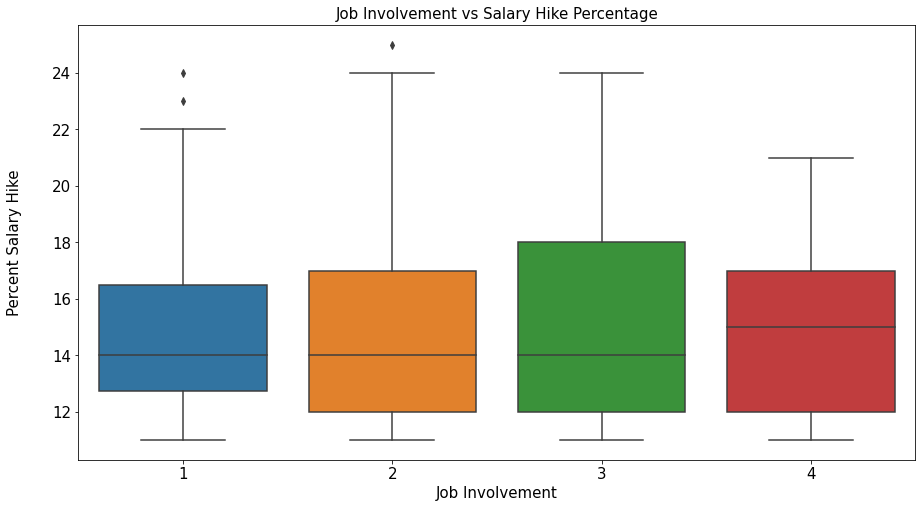

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8));
sns.boxplot(x = 'JobInvolvement', y = 'PercentSalaryHike', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Job Involvement', fontsize = 15);
plt.title('Job Involvement vs Salary Hike Percentage', fontsize = 15);
plt.ylabel('Percent Salary Hike', fontsize = 15, labelpad = 30);
plt.savefig('33 - Boxplot Job Involvement - Salary Hike Percentage', dpi = 300)

#### Box Plot Comparison - OverTime vs MonthlyRate

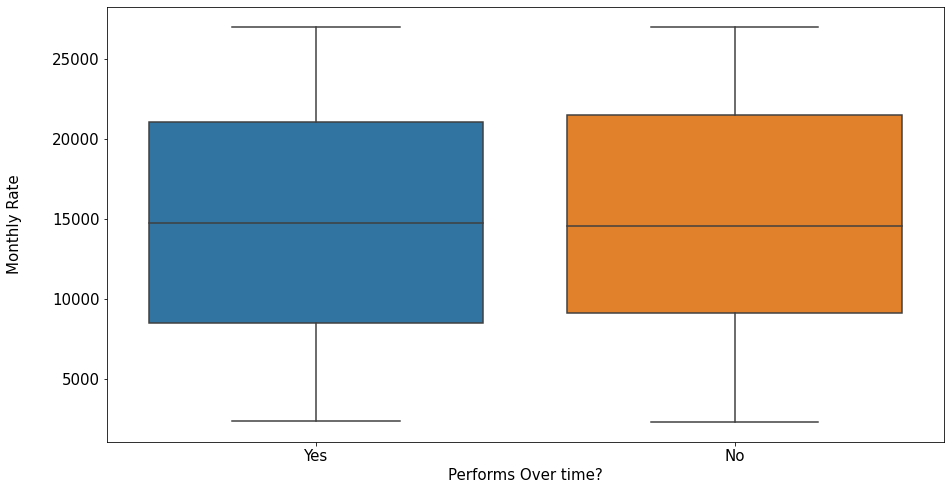

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8));
sns.boxplot(x = 'OverTime', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('Performs Over time?', fontsize = 15);
plt.ylabel('Monthly Rate', fontsize = 15, labelpad = 30);
plt.savefig('34 - Boxplot Overtime - Monthly Rate', dpi = 300)

#### Box Plot Comparison - Job Role vs Monthly Rate

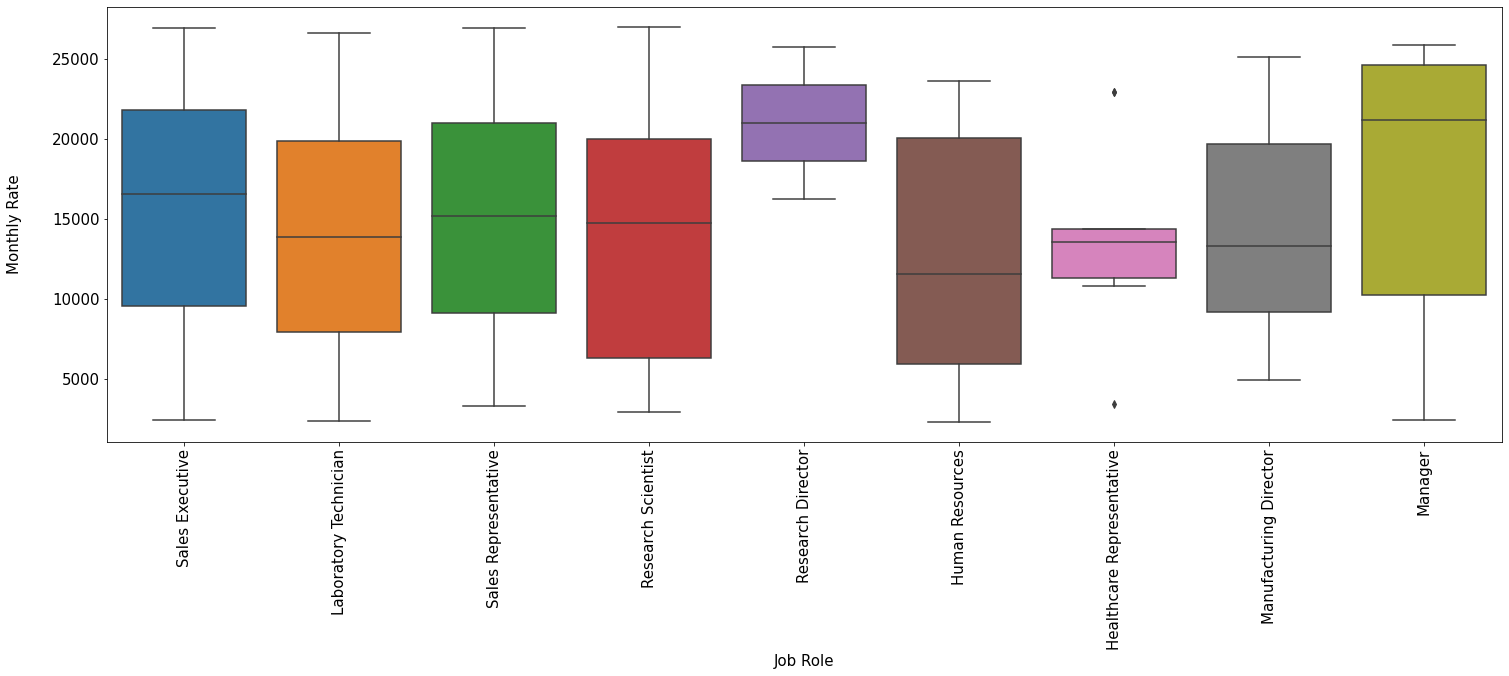

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,8));
sns.boxplot(x = 'JobRole', y = 'MonthlyRate', data = df_Attrition1);

plt.xticks(fontsize = 15, rotation = 90);
plt.yticks(fontsize = 15);
plt.xlabel('Job Role', fontsize = 15);
plt.ylabel('Monthly Rate', fontsize = 15, labelpad = 30);
plt.savefig('35 - Boxplot Job Role - Monthly Rate', dpi = 300)

#### Box Plot Comparison - Job Role vs Distance From Home

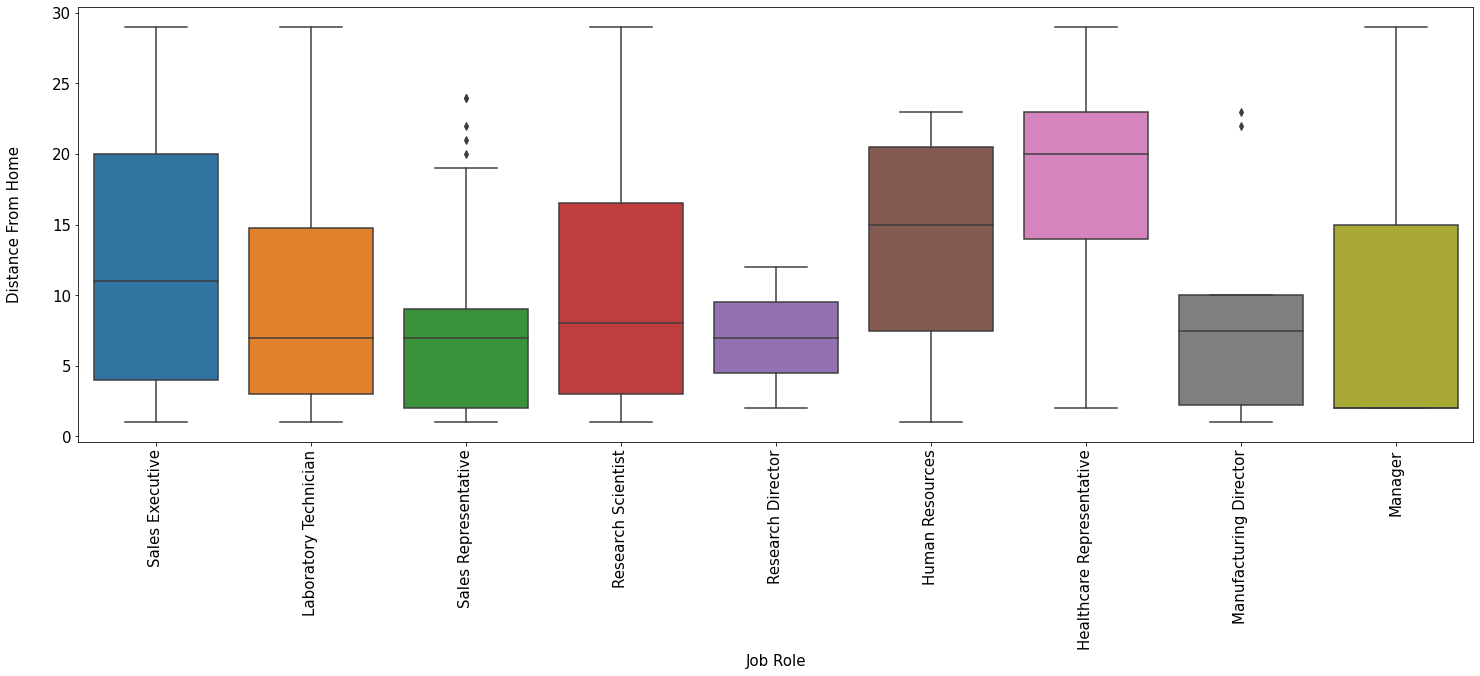

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,8));
sns.boxplot(x = 'JobRole', y = 'DistanceFromHome', data = df_Attrition1);

plt.xticks(fontsize = 15, rotation = 90);
plt.yticks(fontsize = 15);
plt.xlabel('Job Role', fontsize = 15);
plt.ylabel('Distance From Home', fontsize = 15, labelpad = 30);
plt.savefig('36 - Boxplot Job Role - Distance From Home', dpi = 300)

#### Box Plot Comparison - Job Role vs Years in Current Company 

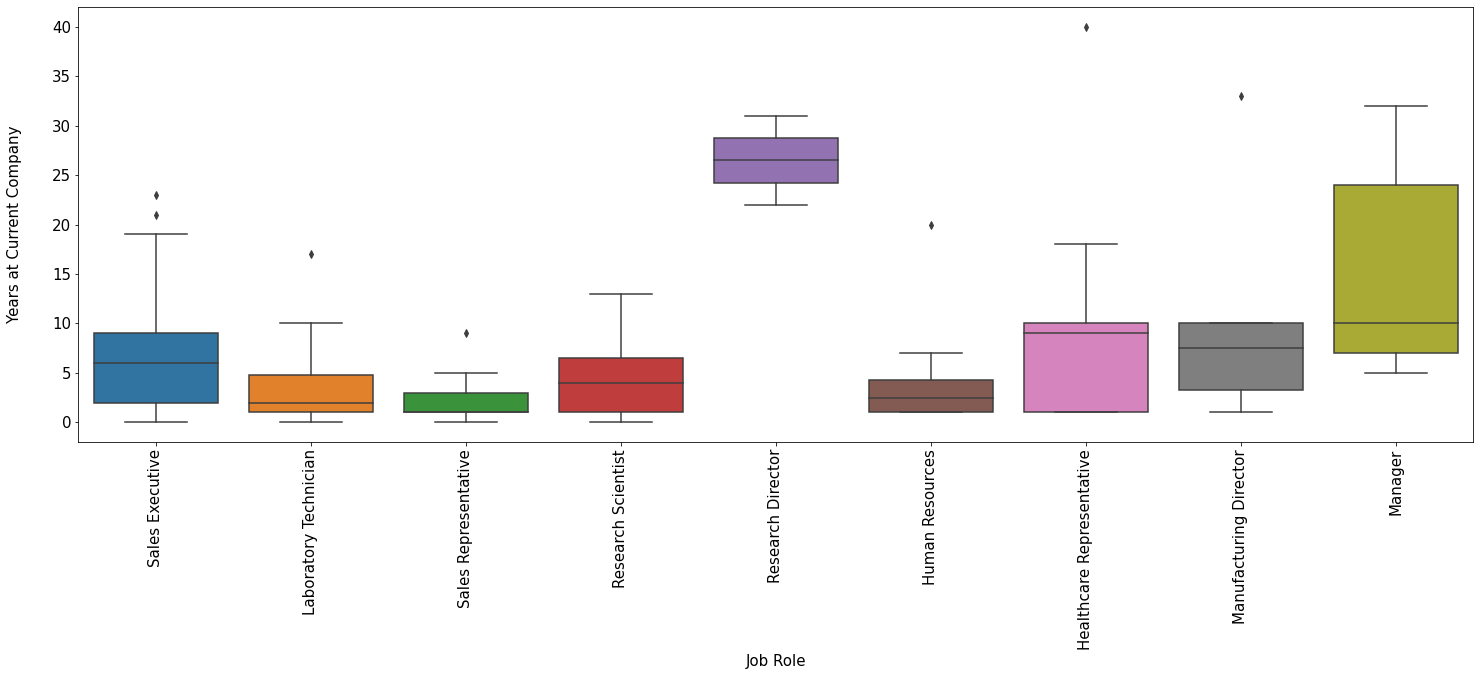

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,8));
sns.boxplot(x = 'JobRole', y = 'YearsAtCompany', data = df_Attrition1);

plt.xticks(fontsize = 15, rotation = 90);
plt.yticks(fontsize = 15);
plt.xlabel('Job Role', fontsize = 15);
plt.ylabel('Years at Current Company', fontsize = 15, labelpad = 30);
plt.savefig('36 - Boxplot Job Role - Years in Current Company', dpi = 300)